In [150]:
import pandas as pd
import ast
import os

file_path = "processedData/database/students_database.csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("Data file not found.")


In [151]:
import json

columns_to_parse = ["Skills", "Projects", "Education", "Internships", "References"]

for col in columns_to_parse:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x.lower()))

columns_to_standardize = ["Name", "DateOfBirth", "Gender", "Email"]
for col in columns_to_standardize:
    df[col] = df[col].apply(lambda x: x.lower())


In [152]:
def filter_skills(row):
    return {
        "technical_skills": list(set(row.get("technical_skills", [])) - {"not found"}),
        "other_skills": list(set(row.get("other_skills", [])) - {"not found"}),
    }

df["filtered_skills"] = df["Skills"].apply(filter_skills)

In [153]:
skills = [
    "Python", "Java", "C++", "C#", "SQL", "PHP", "JavaScript", "HTML", "CSS", ".NET Framework", "ASP.NET",
    "MySQL", "Oracle 10g", "Database Management Systems (DBMS)", "PL/SQL",
    "Web Design", "Web Development", "REST API", "Drupal", "WordPress", "Ajax",
    "Visual Studio", "Eclipse", "Git", "MATLAB", "Android Studio",
    "Linux", "Windows Server", "Red Hat Linux", "Networking",
    "Adobe Photoshop", "Adobe Illustrator", "Adobe Premiere", "Adobe After Effects", "2D and 3D Graphics",
    "Artificial Intelligence", "Neural Networks", "Computer Vision", "Machine Learning", "Data Structures", "Digital Image Processing",
    "Operating Systems", "MATLAB", "Tableau"
]

skills = [x.lower() for x in skills]

In [154]:
skills_set = set([x.lower() for x in skills])

def process_skills(row):
    return {
        "technical_skills": [s.lower() for s in row.get("technical_skills", []) if s.lower() in skills_set],
        "other_skills": [s.lower() for s in row.get("other_skills", []) if s.lower() in skills_set],
    }

df["filtered_skills"] = df["filtered_skills"].apply(process_skills)


In [155]:

def atleast_one_internship(row):
    temp = row
    flag=False
    for val in temp:
        try:
            if str(val["company"])!=str('not found'):
                flag=True
        except:
            pass
            
    return flag

def count_tech_skills(row):
    try:
        temp = row["technical_skills"]
    except:
        return 0
    return len(temp)

def count_other_skills(row):
    try:
        temp = row["other_skills"]
    except:
        return 0
    return len(temp)


df["is_internship"] = df["Internships"].apply(atleast_one_internship)
df["count_tech_skills"] = df["Skills"].apply(count_tech_skills)
df["count_other_skills"] = df["Skills"].apply(count_other_skills)

In [156]:
def countProjects(row):
    count = 0
    for dct in row:
        try:
            if dct.get("project_name", False)=="not found":
                pass
            else:
                count+=1
        except:
            if dct!="not found" and len(dct)>=50:
                count+=1

    return count

df["project_counts"] = df["Projects"].apply(countProjects)

In [157]:
def extract_grades(row):
    cgpa = -1
    if 'bachelors' in row.keys():
        try:
            cgpa = row['bachelors'][0]["cgpa_or_percentage"]
        except:
            cgpa = row['bachelors']["cgpa_or_percentage"]
    
    if str(cgpa) in ['',' ', 'not found', '0 present']:
        cgpa=-1
    elif len(str(cgpa).split(","))>1:
        cgpa = str(cgpa).split(",")[-1]
    elif float(cgpa)>10:
        cgpa=-1
    return cgpa
        


df["cgpa"] = df["Education"].apply(extract_grades)
df["cgpa"] = df["cgpa"].apply(lambda x: float(str(x).strip()))

In [158]:
# Basic data exploration
print("Data Overview:")
print(df.describe())

# Gender distribution
gender_counts = df['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_counts)

# Internship distribution
internship_counts = df['is_internship'].value_counts()
print("\nInternship Distribution:")
print(internship_counts)


Data Overview:
       count_tech_skills  count_other_skills  project_counts        cgpa
count         116.000000           116.00000      116.000000  116.000000
mean            8.775862             5.50000        3.301724    6.950690
std             7.875207             5.46053        2.348801    2.494789
min             0.000000             0.00000        0.000000   -1.000000
25%             4.000000             1.00000        1.000000    6.812500
50%             7.000000             4.00000        4.000000    7.595000
75%            12.000000             8.00000        5.000000    8.200000
max            48.000000            28.00000       10.000000    9.400000

Gender Distribution:
Gender
male      101
female     15
Name: count, dtype: int64

Internship Distribution:
is_internship
True     85
False    31
Name: count, dtype: int64



Average Skill Counts by Internship Status:
               count_tech_skills  count_other_skills
is_internship                                       
False                   8.354839            4.548387
True                    8.929412            5.847059


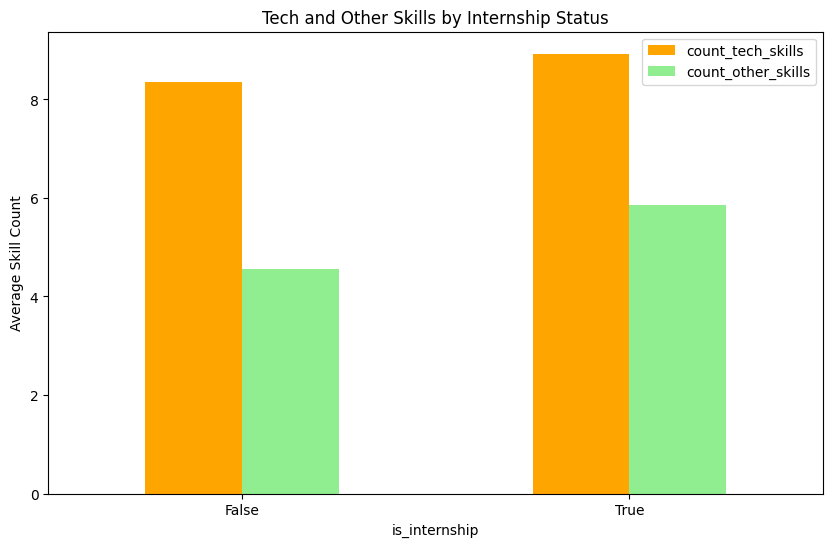

In [159]:
import matplotlib.pyplot as plt

# Average skill counts by internship status
internship_skills = df.groupby('is_internship')[['count_tech_skills', 'count_other_skills']].mean()
print("\nAverage Skill Counts by Internship Status:")
print(internship_skills)

# Visualize
internship_skills.plot(kind='bar', figsize=(10, 6), color=['orange', 'lightgreen'])
plt.title('Tech and Other Skills by Internship Status')
plt.ylabel('Average Skill Count')
plt.xticks(rotation=0)
plt.show()



Average Skill Counts by Internship Status:
               count_tech_skills  count_other_skills  project_counts
is_internship                                                       
False                   8.354839            4.548387        2.741935
True                    8.929412            5.847059        3.505882


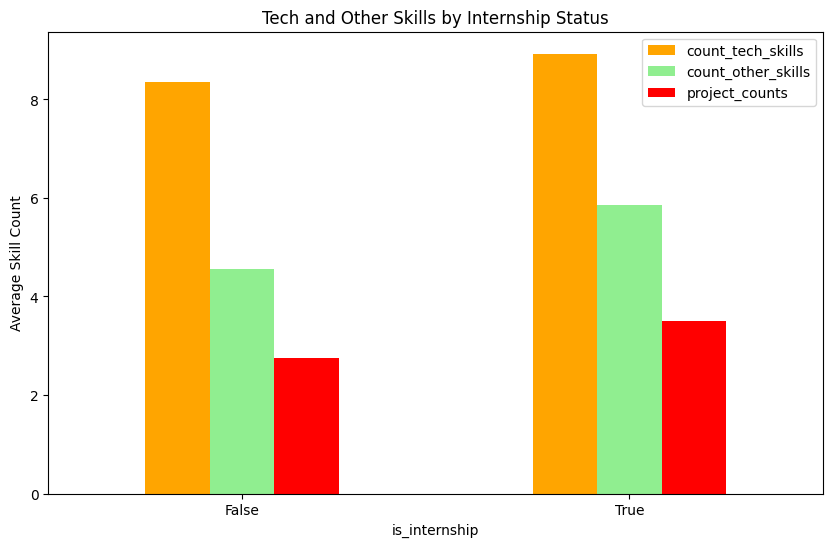

In [160]:
import matplotlib.pyplot as plt

# Average skill counts by internship status
internship_skills = df.groupby('is_internship')[['count_tech_skills', 'count_other_skills', 'project_counts']].mean()
print("\nAverage Skill Counts by Internship Status:")
print(internship_skills)

# Visualize
internship_skills.plot(kind='bar', figsize=(10, 6), color=['orange', 'lightgreen', 'red'])
plt.title('Tech and Other Skills by Internship Status')
plt.ylabel('Average Skill Count')
plt.xticks(rotation=0)
plt.show()


In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, spearmanr


In [162]:
# 1. Correlation Analysis
def analyze_correlation():
    corr_matrix = df[['count_tech_skills', 'count_other_skills', 'cgpa']].corr(method='spearman')
    print("Correlation Matrix (Spearman):")
    print(corr_matrix)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()

# 2. CGPA Distribution Based on Internship
def cgpa_distribution_analysis():
    sns.boxplot(x='is_internship', y='cgpa', data=df)
    plt.title("CGPA Distribution by Internship Status")
    plt.show()
    intern_cgpa = df[df['is_internship']]['cgpa']
    no_intern_cgpa = df[~df['is_internship']]['cgpa']
    t_stat, p_val = ttest_ind(intern_cgpa, no_intern_cgpa)
    print(f"T-test between CGPA of Internship vs No Internship: t-stat={t_stat:.2f}, p-value={p_val:.2e}")


# 4. Ratio of Tech to Other Skills
def skill_ratio_analysis():
    df['skill_ratio'] = np.where(
        (df['count_other_skills'] == 0), 
        np.inf, 
        df['count_tech_skills'] / df['count_other_skills']
    )
    sns.histplot(df['skill_ratio'], bins=10, kde=True, hue=df['is_internship'])
    plt.title("Skill Ratio Distribution")
    plt.xlabel("Tech Skills / Other Skills Ratio")
    plt.show()

# 5. Group-Level Insights
def group_insights():
    group_stats = df.groupby('is_internship').agg({
        'count_tech_skills': ['mean', 'median'],
        'count_other_skills': ['mean', 'median'],
        'cgpa': ['mean', 'median']
    })
    print("Group Statistics by Internship Status:")
    print(group_stats)

# 6. Relationship Between CGPA and Skills
def cgpa_skills_relationship():
    for col in ['count_tech_skills', 'count_other_skills']:
        corr, p_val = spearmanr(df[col], df['cgpa'])
        print(f"Spearman Correlation between CGPA and {col}: {corr:.2f}, p-value={p_val:.2e}")
        sns.scatterplot(x=col, y='cgpa', data=df, hue='is_internship')
        plt.title(f"Relationship Between CGPA and {col}")
        plt.show()

Correlation Matrix (Spearman):
                    count_tech_skills  count_other_skills      cgpa
count_tech_skills            1.000000            0.304571  0.309470
count_other_skills           0.304571            1.000000  0.082376
cgpa                         0.309470            0.082376  1.000000


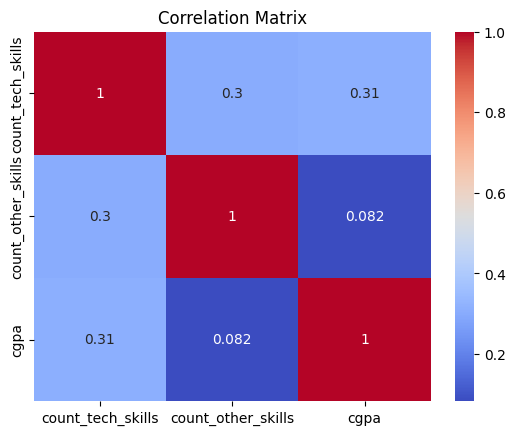

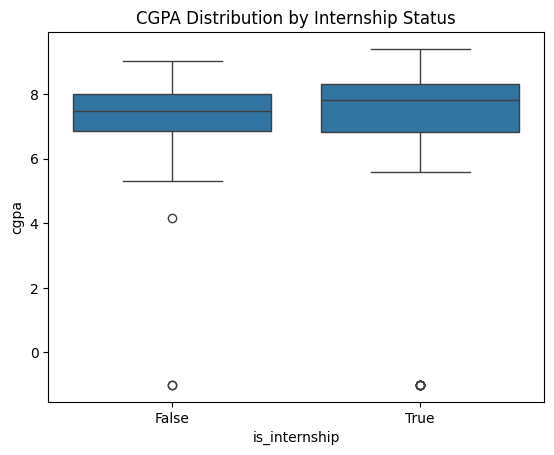

T-test between CGPA of Internship vs No Internship: t-stat=0.42, p-value=6.73e-01
Group Statistics by Internship Status:
              count_tech_skills        count_other_skills             cgpa  \
                           mean median               mean median      mean   
is_internship                                                                
False                  8.354839    6.0           4.548387    3.0  6.788065   
True                   8.929412    7.0           5.847059    5.0  7.010000   

                      
              median  
is_internship         
False           7.48  
True            7.82  


In [163]:
# Execute Analyses
analyze_correlation()
cgpa_distribution_analysis()
# skill_distribution_analysis()
# skill_ratio_analysis()
group_insights()
# cgpa_skills_relationship()